| Problem | Formula|Search Domain|
|---      |----    |----|
|LTDZ1 |${\text{Maximum}}={\begin{cases}f_{1}\left(x_1,x_2,x_3\right)=3-(1+x_3)cos(x_1\pi/2)cos(x_2\pi/2)\\f_{2}\left(x_1,x_2,x_3\right)=3-(1+x_3)cos(x_1\pi/2)sin(x_2\pi/2)\\f_{3}\left(x_1,x_3\right)=3-(1+x_3)sin(x_1\pi/2)\end{cases}}$|$0\leq{x_1,x_2,x_3}\leq1$|

In [1]:
import time 
from pymoo.indicators.hv import Hypervolume
from pymoo.factory import get_performance_indicator
import sys,os 
from PIL import Image               # to load images
from IPython.display import display # to display images

ref_point = None
def calculate_hv(result):
    path = result['path']
    path = os.path.join(os.path.dirname(os.getcwd()),result['path'])
    F = np.loadtxt(path)
    metric = Hypervolume(nds=True,ref_point = ref_point,norm_ref_point=False)
    start_time = time.time()
    hv = metric.do(F)
    exc_time = time.time() - start_time
    return [hv,exc_time]
def hv_result(result):
    get = result.apply(calculate_hv, axis=1)
    df = pd.DataFrame(get.tolist(), columns = ['hv','hv_exc_time'])
    final_result = pd.concat([result, df],axis=1)
    output_result = final_result[['Problem', 'Alg_name', 'Evaluations','Iteration', 'Objectives', 'n_variables','pop_size',
    'exec_time', 'hv',
    'hv_exc_time']]
    print(f'ref_point is {ref_point}')
    output_result = output_result.sort_values(['Alg_name','Iteration','Evaluations'],ascending =True).reset_index(drop=True)
    return output_result

def nadir_deal_point(result):
    path = result['solution_path']
    path = os.path.join(os.path.dirname(os.getcwd()),result['path'])
    F = np.loadtxt(path)
    approx_ideal = F.min(axis=0)
    approx_nadir = F.max(axis=0)
    return [approx_ideal,approx_nadir]
def nadir_deal_point_result(result):
    get = result.apply(nadir_deal_point, axis=1)
    df = pd.DataFrame(get.tolist(), columns = ['approx_ideal','approx_nadir'])
    final_result = pd.concat([result, df],axis=1)
    return final_result

def igd_plus(result):
    path = result['solution_path']
    F = np.loadtxt(path)
    igd_plus = get_performance_indicator("igd+", pf)
    igd_value = igd_plus.do(F)
    return igd_value

# TKLY1 problem 
## - (#variables / #objectives)
 - `#PBS -l ncpus=4,mem=16GB`
 - `#PBS -l walltime=10:00:00`
 - `#PBS -q normal`

## Parameter list 
- do for a in nsga2 nsga3 agnomen rnsga2 `algorithm list`
- do for n_gen in 100 200 500 1000    `iterations`
- do for pop in 40 100 200            `population size`

In [4]:
import pandas as pd 
import numpy as np, os ,sys 
from matplotlib import pyplot as plt 

pd.set_option('display.max_rows', None)
folder = os.path.dirname(os.getcwd())
filename = 'result_5NOV'
path = os.path.join(folder, filename)

result = pd.read_csv(path)


result.loc[:,'path'] = result['path'].str[29:].values
result.loc[:,'image_location'] = result['image_location'].str[29:].values
result.loc[:,'approx_nadir'] = result['approx_nadir'].str[1:-1].values
result = result.drop(columns=['xl','xu'])
tkly1 = result.loc[result['Problem']=='TKLY1'].reset_index(drop=True)
print(f"The number of records {len(tkly1)}")

The number of records 48


In [5]:
#path and image path indicating location of objective file and visualization file
tkly1.iloc[:,-2:].head(5)

,path,image_location
0,TKLY1/NSGA2_TKLY1_4/TKLY1_NSGA2_Iteration-100_...,Images/TKLY1/NSGA2_TKLY1Var-4/TKLY1_NSGA2_Iter...
1,TKLY1/NSGA2_TKLY1_4/TKLY1_NSGA2_Iteration-100_...,Images/TKLY1/NSGA2_TKLY1Var-4/TKLY1_NSGA2_Iter...
2,TKLY1/NSGA2_TKLY1_4/TKLY1_NSGA2_Iteration-100_...,Images/TKLY1/NSGA2_TKLY1Var-4/TKLY1_NSGA2_Iter...
3,TKLY1/NSGA2_TKLY1_4/TKLY1_NSGA2_Iteration-200_...,Images/TKLY1/NSGA2_TKLY1Var-4/TKLY1_NSGA2_Iter...
4,TKLY1/NSGA2_TKLY1_4/TKLY1_NSGA2_Iteration-200_...,Images/TKLY1/NSGA2_TKLY1Var-4/TKLY1_NSGA2_Iter...


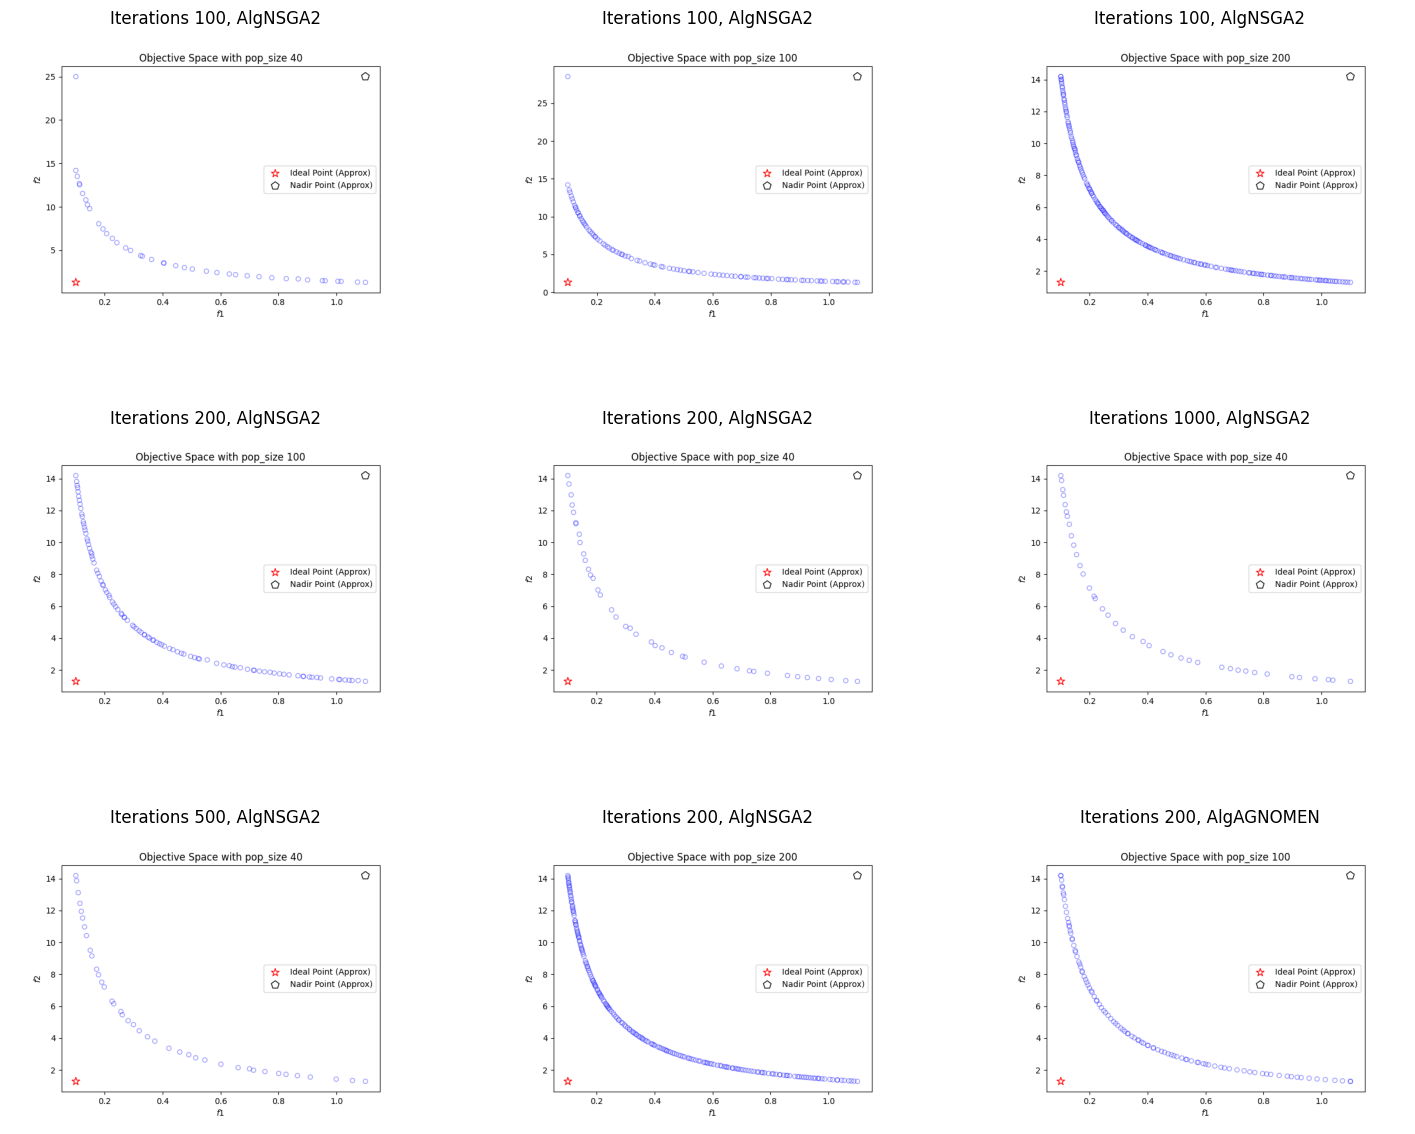

In [6]:
# more figures can be found here: Result/Images/KUR1/..
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplots(figsize=(18,15), dpi=100)
for i in range(9):
    plt.subplot(3,3,i+1)
    f = tkly1['image_location'][i]
    path = os.path.join(folder,f )+'.png'
    img = Image.open(path)
    plt.title(f'Iterations {tkly1.Iteration[i]}, Alg{tkly1.Alg_name[i]}')
    plt.axis('off')
    plt.imshow(img)

In [8]:
nadir_arr  = np.array([np.fromstring(i, dtype=float, sep=' ') for i in np.array(tkly1['approx_nadir'])])

print(f'Global nadir point for kur1 with two variables is :{np.round(np.max(nadir_arr, axis=0),2)}')

ref_point = np.array([ 1.1 ,28.53])
hv_result(tkly1)

Global nadir point for kur1 with two variables is :[ 1.1  28.53]
ref_point is [ 1.1  28.53]


,Problem,Alg_name,Evaluations,Iteration,Objectives,n_variables,pop_size,exec_time,hv,hv_exc_time
0,TKLY1,AGNOMEN,10000,100,2,4,40,2.701234,25.066736,0.000542
1,TKLY1,AGNOMEN,10000,100,2,4,100,2.688269,25.066736,0.000585
2,TKLY1,AGNOMEN,10000,100,2,4,200,2.670310,25.066736,0.000587
3,TKLY1,AGNOMEN,20000,200,2,4,100,5.399205,25.071510,0.000997
4,TKLY1,AGNOMEN,20000,200,2,4,40,5.396788,25.071510,0.000525
5,TKLY1,AGNOMEN,20000,200,2,4,200,5.383798,25.071510,0.000490
6,TKLY1,AGNOMEN,50000,500,2,4,100,14.494753,25.074434,0.000624
7,TKLY1,AGNOMEN,50000,500,2,4,200,14.513260,25.074434,0.000658
8,TKLY1,AGNOMEN,50000,500,2,4,40,14.588172,25.074434,0.000600
9,TKLY1,AGNOMEN,100000,1000,2,4,100,29.963657,25.074490,0.000595


In [9]:
ref_point = np.array([5 ,5])
hv_result(tkly1)

ref_point is [5 5]


,Problem,Alg_name,Evaluations,Iteration,Objectives,n_variables,pop_size,exec_time,hv,hv_exc_time
0,TKLY1,AGNOMEN,10000,100,2,4,40,2.701234,16.586244,0.000394
1,TKLY1,AGNOMEN,10000,100,2,4,100,2.688269,16.586244,0.000346
2,TKLY1,AGNOMEN,10000,100,2,4,200,2.670310,16.586244,0.000392
3,TKLY1,AGNOMEN,20000,200,2,4,100,5.399205,16.596559,0.000336
4,TKLY1,AGNOMEN,20000,200,2,4,40,5.396788,16.596559,0.000329
5,TKLY1,AGNOMEN,20000,200,2,4,200,5.383798,16.596559,0.000326
6,TKLY1,AGNOMEN,50000,500,2,4,100,14.494753,16.597607,0.000360
7,TKLY1,AGNOMEN,50000,500,2,4,200,14.513260,16.597607,0.000359
8,TKLY1,AGNOMEN,50000,500,2,4,40,14.588172,16.597607,0.000333
9,TKLY1,AGNOMEN,100000,1000,2,4,100,29.963657,16.597290,0.000354
